In [1]:
%pip install tensorflow keras matplotlib numpy scikit-learn


  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.1.24-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.2-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.70.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)

from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools

from keras.models import load_model
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


In [3]:
# Load the dataset
train_gen = image_dataset_from_directory(directory="C:\\Users\\pc\\OneDrive\\Desktop\\Plant Disease Image Classification\\archive (15)\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train", image_size=(256, 256))
test_gen = image_dataset_from_directory(directory="C:\\Users\\pc\\OneDrive\\Desktop\\Plant Disease Image Classification\\archive (15)\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid", image_size=(256, 256))

rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


Data Engineering
Data engineering is not needed as the dataset is already augmented, and feature scaling is automatically handled by the image generators. Therefore, the next codes will focus on Model Training and Evaluation.

In [4]:
# Modelling
# =========

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 85, 85, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 85, 85, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 9, 9, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 9, 9, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 9, 9, 512)      │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 9, 9, 512)      │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1568)           │    65,029,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        59,622 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,092,966 (290.27 MB)

 Trainable params: 76,092,966 (290.27 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
ep = 10
history = model.fit(train_gen,
                    validation_data=test_gen,
                    epochs=ep,
                    batch_size=5)


Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 17561s 8s/step - accuracy: 0.2470 - loss: 2.7030 - val_accuracy: 0.8050 - val_loss: 0.6219
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 17282s 8s/step - accuracy: 0.8249 - loss: 0.5548 - val_accuracy: 0.9104 - val_loss: 0.2694
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 13978s 6s/step - accuracy: 0.9007 - loss: 0.3031 - val_accuracy: 0.9118 - val_loss: 0.2695
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 13964s 6s/step - accuracy: 0.9337 - loss: 0.1980 - val_accuracy: 0.9503 - val_loss: 0.1540
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 13949s 6s/step - accuracy: 0.9528 - loss: 0.1429 - val_accuracy: 0.9598 - val_loss: 0.1213
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 14248s 6s/step - accuracy: 0.9621 - loss: 0.1141 - val_accuracy: 0.9632 - val_loss: 0.1161
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 13043s 6s/step - accuracy: 0.9685 - loss: 0.0893 - val_accuracy: 0.9655 - val_loss: 0.1129
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 14743s 7s/step - accuracy: 

In [15]:
model.save("plantDisease_model.h5")


In [17]:
model.save('my_model.keras')

Model Evaluation

In [10]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 253ms/step - accuracy: 0.0612 - loss: 19.4560
Test Accuracy: 0.0606
Test Loss: 19.7281


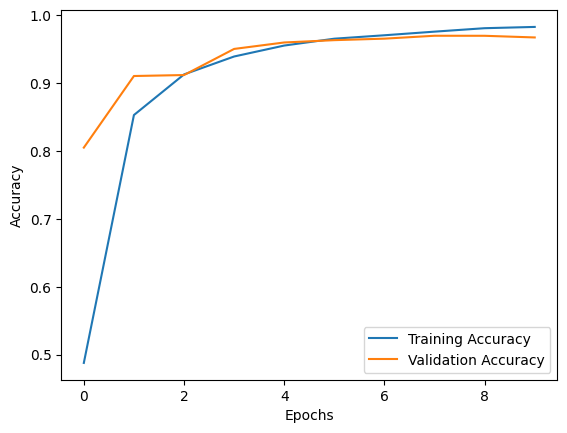

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Using the Saved Model to Make Predictions

In [18]:
# Loading the Saved Model
from tensorflow.keras.models import load_model

# Load the model
model = load_model("plantDisease_model.h5")


In [19]:
#Make a prediction on new imgae
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = "C:\\Users\\pc\\OneDrive\\Desktop\\Plant Disease Image Classification\\archive (15)\\test\\test\\AppleCedarRust1.JPG"
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make prediction
predictions = model.predict(img_array)

# Get predicted class index
predicted_class = np.argmax(predictions)

print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: 2


In [21]:
import os

train_dir = "C:\\Users\\pc\\OneDrive\\Desktop\\Plant Disease Image Classification\\archive (15)\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train"

class_names = sorted(os.listdir(train_dir))  # Sort to maintain consistent indexing
print(class_names)


['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [22]:
predicted_label = class_names[predicted_class]
print(f"Predicted Class: {predicted_label}")


Predicted Class: Apple___Cedar_apple_rust
